### CodeAlong Classification med MLP, Multi Layer Perceptron:
- Vi analyserar ett dataset för breast cancer. Det innehåller 30 förklaringsvariabler.
- Vi använder ett MLP med 2 dolda lager (hidden layers).
- En (1) output, som är en sigmoid. Man avrundar output till 0 eller 1, så får man sin prediktion.
- Utvärderar resultatet med confusion matrix mm

In [ ]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="white")

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

np.isnan(X).any() # check for NaN values


np.False_

In [2]:
X.shape, y.shape

((569, 30), (569,))

Gör train test split, inklusive valideringsdataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scaler = StandardScaler()

scaled_X_train_val = scaler.fit_transform(X_train_val)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

Skapar det neurala nätverket:

In [7]:
import keras
from keras import layers
from keras.models import Sequential

model = keras.Sequential([layers.InputLayer(shape=(X.shape[1],), name='input'),
                          layers.Dense(32, activation='relu', name='hidden1'),
                          layers.Dense(32, activation='relu', name='hidden2'),
                          layers.Dense(1, activation='sigmoid', name='output')],
                          name='breast_cancer_model')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "breast_cancer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081 (8.13 KB)

 Trainable params: 2,081 (8.13 KB)

 Non-trainable params: 0 (0.00 B)

Tränar modellen:

In [8]:
model.fit(scaled_X_train_val, y_train_val, epochs=200, batch_size=32, validation_data=(scaled_X_val, y_val), verbose=0)

Utvärderar träningen:

<Axes: xlabel='epochs', ylabel='loss/accuracy'>

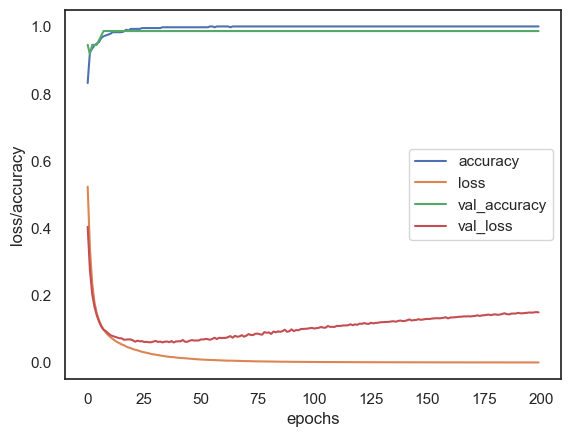

In [9]:
pd.DataFrame(model.history.history).plot(xlabel='epochs',ylabel='loss/accuracy')

Implementerar "EarlyStopping":

In [10]:
from keras.callbacks import EarlyStopping

early_stopper =  EarlyStopping(monitor="val_loss", mode="min", patience=15)

model = keras.Sequential([layers.InputLayer((X.shape[1],), name="Input"),
                          layers.Dense(30, name="Layer_1", activation="relu"),
                          layers.Dense(30, name="Layer_2", activation="relu"),
                          layers.Dense(1, name="output", activation="sigmoid")],
                         name="Classifier")
model.compile(loss= "binary_crossentropy", optimizer="adam")

model.fit(scaled_X_train_val, y_train_val, epochs=1000,
          validation_data=[scaled_X_val, y_val], callbacks=[early_stopper], verbose=1)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.5345 - val_loss: 0.4142
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3748 - val_loss: 0.3062
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2809 - val_loss: 0.2418
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2092 - val_loss: 0.2012
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1889 - val_loss: 0.1723
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1603 - val_loss: 0.1475
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1270 - val_loss: 0.1310
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1352 - val_loss: 0.1157
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1060 - val_loss: 0.1050
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1079 - val_loss: 0.0956
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0803 - val_loss: 0.0919
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

Plottar träningshistoriken:

<Axes: xlabel='Epochs', ylabel='Crossentropy loss'>

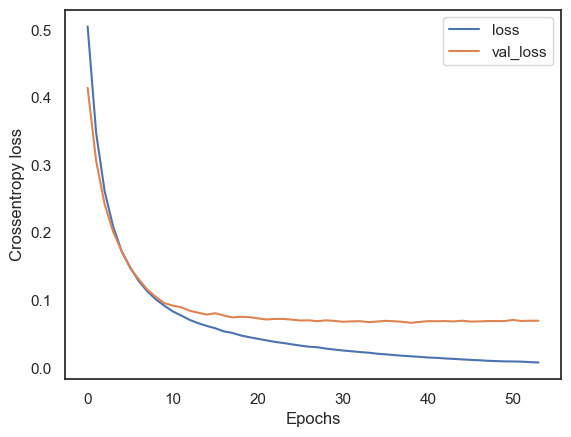

In [11]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(xlabel="Epochs", ylabel="Crossentropy loss")

Utvärderar resultatet med:
- Confusion matrix  
- Classification Report

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[9.1989172e-01]
 [4.0189724e-04]
 [7.3674745e-03]
 [9.8853642e-01]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.96      0.98      0.97        54

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86



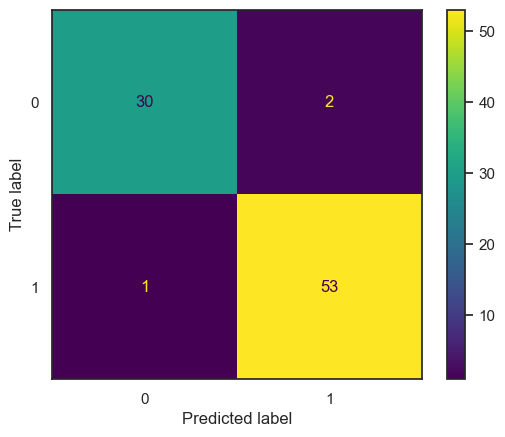

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

scaled_X_train = scaler.transform(X_train)

model = keras.Sequential([layers.InputLayer((X.shape[1],), name="Input"),
                          layers.Dense(30, name="Layer_1", activation="relu"),
                          layers.Dense(30, name="Layer_2", activation="relu"),
                          layers.Dense(1, name="output", activation="sigmoid")],
                         name="Classifier")
model.compile(loss="binary_crossentropy", optimizer="adam")

# scaled_X_train.shape, y_train.shape
model.fit(scaled_X_train, y_train, epochs=len(df_loss), validation_data=[scaled_X_test, y_test],
          callbacks=[early_stopper], verbose=0)

final_loss = pd.DataFrame(model.history.history)

y_pred = model.predict(scaled_X_test)
print(y_pred[:4])

y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))